## 七月在线机器学习实训营三期第八周(深度学习)考试
#### 考试说明:
- 起止时间：请同学在2018年3月30日至4月1日期间完成，最晚提交时间本周日（4月1日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam8后，进行作答。例如wangwei-exam8
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，数据文件，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/8/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>_陈益梦_</u>  
- 批改人： David
- 最终得分: 100

<center><h1>####答卷开始####</h1></center>
<hr>

## 一、简答题(共10题，1-8题每题5分，最后两题每题10分。共计60分)

#### 1.试写您对深度学习的理解，以及它与传统机器学习的关系，相同与不同之处。

深度学习：深度学习是一个框架，在图片和多媒体资源表现更突出，是一种端到端的学习方法。<br>
与机器学习关系：深度学习是机器学习的一种。<br>
相同之处：使用算法来解析数据、从中学习，然后对真实世界中的事件做出预测。训练过程包括表达，评估和调优。<br>
不同之处：在传统机器学习中，手工设计特征对学习效果很重要，但是特征工程非常繁琐。而深度学习能够从大数据中自动学习特征，这也是深度学习在大数据时代受欢迎的一大原因。<br>
![](AL_ML_DL.jpg)

#### 2.简要介绍下您了解的keras框架? 以及进行一个任务的基本流程

keras 是易用的神经网络框架，搭建神经网络像搭积木一样简单，后端可以用不同的DL框架支撑，比如theano，Tensorflow，微软的CNTK等。

基本流程：以鸢尾化数据集作为测试数据集<br>
(1)引入库

In [3]:
from keras.models import Sequentialquential
from keras.layers import Dense, Activation

(2)初始化“模型架子” 并通过add添加层

In [38]:
model = Sequential()

model.add(Dense(units=2, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(units=3))
# model.add(Activation('sigmoid'))
model.add(Activation('softmax'))

(3)通过compile 编译模型

In [50]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_11 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 9         
_________________________________________________________________
activation_12 (Activation)   (None, 3)                 0         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


(4)灌入数据训练

In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
105/105 [==============================] - 0s 76us/step - loss: 0.9474 - acc: 0.3810
Epoch 2/20
105/105 [==============================] - 0s 76us/step - loss: 0.8569 - acc: 0.4476
Epoch 3/20
105/105 [==============================] - 0s 105us/step - loss: 0.8193 - acc: 0.5333
Epoch 4/20
105/105 [==============================] - 0s 86us/step - loss: 0.7967 - acc: 0.6286
Epoch 5/20
105/105 [==============================] - 0s 67us/step - loss: 0.7907 - acc: 0.6476
Epoch 6/20
105/105 [==============================] - 0s 57us/step - loss: 0.7871 - acc: 0.6571
Epoch 7/20
105/105 [==============================] - 0s 67us/step - loss: 0.7834 - acc: 0.6667
Epoch 8/20
105/105 [==============================] - 0s 48us/step - loss: 0.7793 - acc: 0.6667
Epoch 9/20
105/105 [==============================] - 0s 67us/step - loss: 0.7766 - acc: 0.6667
Epoch 10/20
105/105 [==============================] - 0s 57us/step - loss: 0.7744 - acc: 0.6857
Epoch 11/20
105/105 [=================

In [56]:
model.train_on_batch(X_train, y_train)

[0.74741793, 0.6857143]

(5)在测试集上评估效果

In [58]:
loss_and_metrics = model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 978us/step


In [59]:
loss_and_metrics

[0.81844032870398631, 0.60000000529819064]

(6)实际预测

In [61]:
classes = model.predict(X_test)

In [62]:
# 得到的是概率
classes

array([[ 0.0104317 ,  0.33325481,  0.65631348],
       [ 0.0269481 ,  0.36996248,  0.60308945],
       [ 0.40413627,  0.32021269,  0.2756511 ],
       [ 0.00518768,  0.30533478,  0.68947756],
       [ 0.40413627,  0.32021269,  0.2756511 ],
       [ 0.00846328,  0.32487497,  0.66666168],
       [ 0.40413627,  0.32021269,  0.2756511 ],
       [ 0.02400967,  0.36574122,  0.61024904],
       [ 0.01712265,  0.35287651,  0.63000083],
       [ 0.03799694,  0.38173598,  0.58026707],
       [ 0.0134499 ,  0.34338555,  0.64316452],
       [ 0.03396257,  0.37804273,  0.58799469],
       [ 0.03005403,  0.37384257,  0.59610343],
       [ 0.02004129,  0.35894468,  0.62101406],
       [ 0.02829953,  0.3717171 ,  0.59998333],
       [ 0.40413627,  0.32021269,  0.2756511 ],
       [ 0.02994994,  0.37372091,  0.59632909],
       [ 0.0372864 ,  0.38112691,  0.58158666],
       [ 0.40413627,  0.32021269,  0.2756511 ],
       [ 0.40413627,  0.32021269,  0.2756511 ],
       [ 0.01785322,  0.35449848,  0.627

#### 3.工业界在训练深度学习模型时，采用训练方式多为SGD（mini-batch），请简述这种方式较其它方式的优点？

常用优化算法：SGD,RMSprop,Adagrad,Adadelta,Adam<br>
SGD(mini-batch)优点：<br>
(1) 当训练数据太多时，利用整个数据集更新往往时间上不显示。batch的方法可以减少机器的压力，并且可以更快地收敛。<br>
(2) 当训练集有很多冗余时（类似的样本出现多次），batch方法收敛更快。以一个极端情况为例，若训练集前一半和后一半梯度相同。那么如果前一半作为一个batch，后一半作为另一个batch，那么在一次遍历训练集时，batch的方法向最优解前进两个step，而整体的方法只前进一个step。<br>

#### 4.  请简述神经风格中的BP模型的信号正向传播与误差反向传播的过程？

BP算法的基本思想是，学习过程由信号的正向传播与误差的反向传播两个过程组成。<br>
　　1）正向传播：输入样本－>输入层－>各隐层（处理）－>输出层<br>
　　注1：若输出层实际输出与期望输出（教师信号）不符，则转入2）（误差反向传播过程）。<br>
　　2）误差反向传播：输出误差（某种形式）－>隐层（逐层）－>输入层 <br>
　　反向传播主要目的是通过将输出误差反传，将误差分摊给各层所有单元，从而获得各层单元的误差信号，进而修正各单元的权值（其过程，是一个权值调整的过程）。<br>
　　注2：权值调整的过程，也就是网络的学习训练过程（学习也就是这么的由来，权值调整）。<br>
　　1）初始化<br>
　　2）输入训练样本对，计算各层输出<br>
　　3）计算网络输出误差<br>
　　4）计算各层误差信号<br>
　　5）调整各层权值<br>
　　6）检查网络总误差是否达到精度要求<br>
　　满足，则训练结束；不满足，则返回步骤2。<br>
　　1）易形成局部极小（属贪婪算法，局部最优)而得不到全局最优；<br>
　　2）训练次数多使得学习效率低下，收敛速度慢（需做大量运算）；<br>
　　3）隐节点的选取缺乏理论支持；<br>
　　4）训练时学习新样本有遗忘旧样本趋势。<br>

#### 5.  在什么情况下，会使用到早停法earyly stoping? 使用早停法可以防止什么情况发生？

原因：继续训练会导致测试集上准确率下降<br>
作用：防止过拟合和不收敛的现象，加快学习速度，提高调参效率

#### 6.  训练多层神经网络时可以采用哪些方式防止过拟合？

防止过拟合的方法：<br>
1.early stop（及早停止） <br>
在模型训练过程中，在训练数据集上，代价函数会一直降低，但是训练出来的模型在测试集上的结果是先升高，在过了一定的训练轮数后，结果会在最高值附近波动甚至减低，这是因为模型学习到了训练数据集的一些独有特性，而这些特性是测试集不具有的，也就是说，这些特性不具有普遍性。 <br>
一般来说，训练数据集划分为训练基、验证集、测试集，在训练过程中，每经过一个epoch，就在验证集上进行测试，当测试结果经过几轮不再提高时，就停止训练。 <br>
2.data expending（扩大训练数据） <br>
在前面提到，过拟合是因为模型学习到了训练集的独有特性，那么如果我们的训练集能够涵盖所有样本空间，那么它就会学习到样本特征空间的普遍特性，而独特性将不复存在，因为测试集不会超出样本的特征空间，所以结果和训练集应该一致。 <br>
3、L1和L2正则化加权<br>
因为L1约束每次都向权重为零的方向移动，所以导致最后的参数比较稀疏。而L2约束控制了权重的大小，所以权重的幅度较小且比较均匀。<br> 
4、dropout<br>
在每一个batch的训练过程中，先根据删去后的网络预测结果，然后用BP算法更新网络参数。训练很多epochs后，相当于得到了非常多的神经网络（可以说无穷多个），所以drop out会非常有效防止过拟合。<br>

#### 7.  进行深度学习任务时，使用激活函数是为了解决什么问题？ 常用的激活函数有哪些？

解决问题：假设一个示例神经网络中仅包含线性卷积和全连接运算，那么该网络仅能够表达线性映射，即便增加网络的深度也依旧还是线性映射，难以有效建模实际环境中非线性分布的数据。加入（非线性）激活函数之后，深度神经网络才具备了分层的非线性映射学习能力。<br>
常用的激活函数：Sigmoid，tanh，ReLU（变种LReLU、PReLU与RReLU），ELU，Maxout，Softmax<br>
- Sigmoid<br>
一个平滑函数，并且具有连续性和可微性。与线性函数相比，它的最大优点就是非线性。这意味着多个神经元使用S（Sigmoid简称）形函数作为激活函数时，输出也是非线性的。但是Sigmod 只有在[-3, 3]之间梯度高，容易造成梯度弥散。<br>
- tanh<br>
sigmoid函数的另一个问题是，y轴取值范围[0，1]。这个函数在原点周围不对称，得到的值都是正的。我们不希望下一个神经元得到的值在任何时候都是正值，不过可以通过缩放sigmoid函数来解决这个问题，缩放之后得到tanh。与Sigmoid函数相比，tanh函数的梯度更陡。 使用sigmoid函数还是tanh函数取决于问题陈述中对梯度的要求。 但是tanh函数出现了Sigmoid函数类似的问题，梯度渐趋平坦，并且值非常低。<br>
- ReLU<br>
ReLU函数优于其他激活函数的一大优点是它不会同时激活所有的神经元。如果输入值是负的，ReLU函数会转换为0，而神经元不被激活。这意味着，在一段时间内，只有少量的神经元被激活，神经网络的这种稀疏性使其变得高效且易于计算。<br>
- LReLU<br>
当aiai比较小而且固定的时候，我们称之为LReLU。LReLU最初的目的是为了避免梯度消失。但在一些实验中，我们发现LReLU对准确率并没有太大的影响。很多时候，当我们想要应用LReLU时，我们必须要非常小心谨慎地重复训练，选取出合适的aa，LReLU的表现出的结果才比ReLU好。因此有人提出了一种自适应地从数据中学习参数的PReLU。<br>
- PReLU<br>
PReLU是LReLU的改进，可以自适应地从数据中学习参数。PReLU具有收敛速度快、错误率低的特点。PReLU可以用于反向传播的训练，可以与其他层同时优化。<br>
- RReLU<br>
在一定程度上能起到正则效果。<br>
- ELU<br>
ELU减少了正常梯度与单位自然梯度之间的差距，从而加快了学习。在负的限制条件下能够更有鲁棒性。<br>
- Maxout<br>
maxout网络能够近似任意连续函数，且当w2,b2,…,wn,bn为0时，退化为ReLU。Maxout能够缓解梯度消失，同时又规避了ReLU神经元死亡的缺点，但增加了参数和计算量。<br>
- Softmax<br>
函数也是一种sigmoid函数，但它在处理分类问题时很方便。sigmoid函数只能处理两个类。softmax函数最好在分类器的输出层使用。<br>

#### 8 . 请简要说明CNN网络的框架结构

1. 卷积神经网络结构

卷积神经网络是一个多层的神经网络，每层都是一个变换（映射），常用卷积convention变换和pooling池化变换，每种变换都是对输入数据的一种处理，是输入特征的另一种特征表达；每层由多个二维平面组成，每个平面为各层处理后的特征图（feature map）。

常见结构：
![](CNN1)

输入层为训练数据，即原始数据，网络中的每一个特征提取层（C-层）都紧跟着一个二次提取的计算层（S-层），这种特有的两次特征提取结构使网络在识别时对输入样本有较高的畸变容忍能力。具体C层和S层的个数不确定，依据具体案例而定；最后一个S，即完成了对原始数据的特征提取后，把S层的特征数据进行向量化（vector），然后连接到相应分类器。

一个具有7（输入层+c1+s2+c3+s4+c5+v）层网络结构的字母识别的CNN网络
![](CNN2)
2  卷积层Convolution作用：

卷积操作：用一个滤波器（就是一个小特征矩阵，也称卷积核）在图像矩阵上游走，在对应位置元素相乘，再把相乘的结果相加，最后相加的结果形成新的图像矩阵，游走完成后即完成了对原始图像的卷积变换（映射变换），形成此滤波器下的特征提取。

C层是一个特征提取层，为什么用卷积运算；卷积运算一个重要的特点就是，通过卷积运算，可以使原信号特征增强，并且降低噪音；例如用增强边缘的卷积去处理图像，处理后的图像边缘特征增强。

3  S层作用：

S-层可看作是模糊滤波器，起到二次特征提取的作用。S层又叫做subsample层，子采样层或者pooling（池化）层

在通过卷积获得了特征 (features)之后，下一步我们希望利用这些特征去做分类。理论上讲，人们可以用所有提取得到的特征去训练分类器，例如 softmax分类器，但这样做面临计算量的挑战。例如：对于一个 96X96像素的图像，假设我们已经学习得到了400个定义在8X8输入上的特征，每一个特征和图像卷积都会得到一个 (96 − 8 + 1) * (96 − 8 + 1) = 7921 维的卷积特征，由于有 400个特征，所以每个样例 (example)都会得到一个 892 *400 = 3,168,400维的卷积特征向量。学习一

个拥有超过 3百万特征输入的分类器十分不便，并且容易出现过拟合 (over-fitting)。

为了解决这个问题，首先回忆一下，我们之所以决定使用卷积后的特征是因为图像具有一种“静态性”的属性，这也就意味着在一个图像区域有用的特征极有可能在另一个区域同样适用。因此，为了描述大的图像，一个很自然的想法就是对不同位置的特征进行聚合统计，例如，人们可以计算图像一个区域上的某个特定特征的平均值 (或最大值)。这些概要统计特征不仅具有低得多的维度 (相比使用所有提取得到的特征)，同时还会改善结果(不容易过拟合)。这种聚合的操作就叫做池化 (pooling)，有时也称为平均池化或者最大池化 (取决于计算池化的方法)。

#### 9.请简述应当从哪些方向上思考和解决深度学习中出现的的over fitting问题？

(1) 数据层面<br>
- 获取更多的数据：从数据源头获取；根据当前数据集估计数据分布参数，使用分布产生；数据增强，通过一定规则获取数据，例如图像平移，翻转，缩放，切割等<br>
- 考虑数据降维，例如PCA，SVD等，选取重要特征<br>
- 重新清洗数据，增大数据的训练集<br>


(2) 模型层面<br>


- 使用合适的模型：过拟合的主要原因为，数据太少+模型太复杂。对于神经网络来讲，可以减少网络层数及神经元个数；<br>
- 训练时间的把控，Early stopping；<br>
- Dropout，这是一个很高效的方法，在训练时，每次随机（如50%）忽略隐层的某些节点，这样，我们相当于随机从2^H个模型中采样选择模型，类似于bagging，此外，不同模型之间权值共享，相当于一种权值正则方法，实际效果比L2更好。<br>
- 限制权值，即正则化（regularization），L1或L2；<br>
- 增加噪声，噪声随着网络传播，按照权值的平方放大，并传播到输出层，对误差cost产生影响。在输入中加高斯噪声，会达到与L2类似的效果；也可在权值和网络响应上加噪声。<br>

#### 10. 谈谈您对深度学习中的自适应学习率的了解

- note:加入常用-几个算法的简要介绍会更好。

在模型的初期的时候，往往设置为较大的学习速率比较好，因为距离极值点比较远，较大的学习速率可以快速靠近极值点；而，后期，由于已经靠近极值点，模型快收敛了，此时，采用较小的学习速率较好，较大的学习速率，容易导致在真实极值点附近来回波动，就是无法抵达极值点。

## 二、实验题(共1题，共计40分)

- note: 40

### 1. 请使用keras框架，构建CNN网络完成对MNIST数据集的训练，评估及预测

#### （1）load data

In [119]:
# import os, struct, numpy as np

# def load_mnist(path, kind='train'):
#     '''Load MNIST data from "path" '''
#     labels_path = os.path.join(path, '{}-labels.idx1-ubyte'.format(kind))
#     images_path = os.path.join(path, '{}-images.idx3-ubyte'.format(kind))
#     with open(labels_path, 'rb') as lbpath:
#         magic, n = struct.unpack('>II', lbpath.read(8))
#         labels = np.fromfile(lbpath, dtype=np.uint8)
#     with open(images_path, 'rb') as imgpath:
#         magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
#         images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
#     return images, labels

# X_train, y_train = load_mnist('E:/AI/WorkSpace/machine_learning/08_Week/data/')
# X_test, y_test = load_mnist('E:/AI/WorkSpace/machine_learning/08_Week/data/', kind='t10k')

In [3]:
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_test_orig = X_test

#### (2)可视化

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

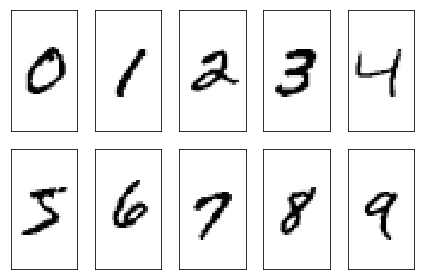

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    
# 去掉横纵坐标刻度
ax[0].set_xticks([])
ax[0].set_yticks([])
# 自动调整子图显示布局 
plt.tight_layout()
plt.show()

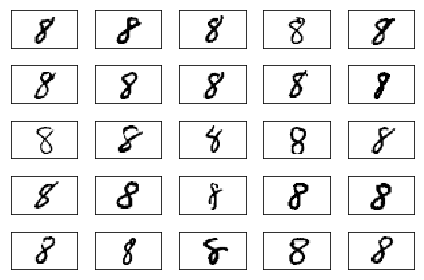

In [70]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 8][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

#### （3）CNN

In [71]:
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [120]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [121]:
nb_classes = 10
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [122]:
X_train.shape

(60000, 28, 28, 1)

In [123]:
def make_model(dense_layer_sizes, filters, kernel_size, pool_size):
    model = Sequential()
    
    model.add(Conv2D(filters, (kernel_size, kernel_size), padding='valid', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(filters, (kernel_size, kernel_size)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(32, (3, 3), activation='relu'))
#     model.add(Conv2D(32, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

    model.add(Flatten())
    for layer_size in dense_layer_sizes:
        model.add(Dense(layer_size))
        model.add(Activation('relu'))
#     model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    return model


In [125]:
model = make_model([32], 8, 3, 2)

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
activation_26 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 8)         584       
_________________________________________________________________
activation_27 (Activation)   (None, 24, 24, 8)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)              0         
__________

In [127]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.6664 - acc: 0.7749
Epoch 2/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.3268 - acc: 0.8949
Epoch 3/10
60000/60000 [==============================] - 26s 425us/step - loss: 0.2768 - acc: 0.9109
Epoch 4/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.2511 - acc: 0.9187
Epoch 5/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.2346 - acc: 0.9250
Epoch 6/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.2199 - acc: 0.9294
Epoch 7/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.2204 - acc: 0.9297
Epoch 8/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.2075 - acc: 0.9343
Epoch 9/10
60000/60000 [==============================] - 26s 426us/step - loss: 0.2047 - acc: 0.9347
Epoch 10/10
60000/60000 [==============================] - 26s 429us/step - loss: 

In [132]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=32)
print('layer_size=[32] \nbatch_size=32 \nepochs=10 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 2s 150us/step
layer_size=[32] 
batch_size=32 
epochs=10 
loss : 0.05478881113802272, acc : 0.9828


In [133]:
model.fit(X_train, y_train, batch_size=32, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 25s 414us/step - loss: 0.1932 - acc: 0.9385
Epoch 2/3
60000/60000 [==============================] - 24s 400us/step - loss: 0.1906 - acc: 0.9397
Epoch 3/3
60000/60000 [==============================] - 25s 414us/step - loss: 0.1848 - acc: 0.9399


In [134]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=32)
print('layer_size=[32] \nbatch_size=32 \nepochs=3 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 2s 151us/step
layer_size=[32] 
batch_size=32 
epochs=3 
loss : 0.05240208784162823, acc : 0.9828


In [135]:
model.fit(X_train, y_train, batch_size=32, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 24s 402us/step - loss: 0.1905 - acc: 0.9394
Epoch 2/6
60000/60000 [==============================] - 24s 407us/step - loss: 0.1818 - acc: 0.9414
Epoch 3/6
60000/60000 [==============================] - 26s 431us/step - loss: 0.1823 - acc: 0.9422
Epoch 4/6
60000/60000 [==============================] - 25s 418us/step - loss: 0.1756 - acc: 0.9444
Epoch 5/6
60000/60000 [==============================] - 25s 416us/step - loss: 0.1770 - acc: 0.9424
Epoch 6/6
60000/60000 [==============================] - 25s 416us/step - loss: 0.1778 - acc: 0.9436


In [136]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=32)
print('layer_size=[32] \nbatch_size=32 \nepochs=6 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 1s 150us/step
layer_size=[32] 
batch_size=32 
epochs=6 
loss : 0.04335112978842808, acc : 0.9875


## epochs 为10 和 3 的时候acc低于 epochs 为6的时候

In [137]:
model = make_model([64], 8, 3, 2)

In [138]:
model.fit(X_train, y_train, batch_size=32, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 26s 437us/step - loss: 0.4001 - acc: 0.8729
Epoch 2/6
60000/60000 [==============================] - 26s 426us/step - loss: 0.1908 - acc: 0.9422
Epoch 3/6
60000/60000 [==============================] - 26s 435us/step - loss: 0.1543 - acc: 0.9540
Epoch 4/6
60000/60000 [==============================] - 26s 440us/step - loss: 0.1375 - acc: 0.9582
Epoch 5/6
60000/60000 [==============================] - 26s 431us/step - loss: 0.1263 - acc: 0.9615
Epoch 6/6
60000/60000 [==============================] - 26s 429us/step - loss: 0.1167 - acc: 0.9647


In [139]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=32)
print('layer_size=[64] \nbatch_size=32 \nepochs=6 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 2s 165us/step
layer_size=[64] 
batch_size=32 
epochs=6 
loss : 0.06360152727491222, acc : 0.9784


## 当batch_size=32 & epochs=6 的时候， layer_size 由32 变为64 的时候，acc 下降0.009

In [140]:
model.fit(X_train, y_train, batch_size=32, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 27s 443us/step - loss: 0.1083 - acc: 0.9671
Epoch 2/3
60000/60000 [==============================] - 26s 430us/step - loss: 0.1067 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 26s 429us/step - loss: 0.1034 - acc: 0.9690


In [141]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=32)
print('layer_size=[64] \nbatch_size=32 \nepochs=3 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 2s 155us/step
layer_size=[64] 
batch_size=32 
epochs=3 
loss : 0.04159635630205948, acc : 0.9868


## 当layer_size=[64] & batch_size=32 的时候， epochs 由6改为3，acc 上升0.008

In [142]:
model = make_model([32, 32], 8, 3, 2)

In [143]:
model.fit(X_train, y_train, batch_size=32, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 26s 428us/step - loss: 0.5464 - acc: 0.8267
Epoch 2/6
60000/60000 [==============================] - 25s 420us/step - loss: 0.2250 - acc: 0.9381
Epoch 3/6
60000/60000 [==============================] - 26s 428us/step - loss: 0.1802 - acc: 0.9498
Epoch 4/6
60000/60000 [==============================] - 25s 423us/step - loss: 0.1551 - acc: 0.9571
Epoch 5/6
60000/60000 [==============================] - 27s 448us/step - loss: 0.1445 - acc: 0.9599
Epoch 6/6
60000/60000 [==============================] - 26s 441us/step - loss: 0.1342 - acc: 0.9617


In [144]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=32)
print('layer_size=[32, 32] \nbatch_size=32 \nepochs=6 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 2s 163us/step
layer_size=[32, 32] 
batch_size=32 
epochs=6 
loss : 0.056025798399326775, acc : 0.9846


## 当batch_size=32 & epochs=6 的时候，layer_size 由 32 改为 [32, 32]，acc 提升0.006

In [145]:
model.fit(X_train, y_train, batch_size=32, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 26s 425us/step - loss: 0.1231 - acc: 0.9642
Epoch 2/3
60000/60000 [==============================] - 25s 424us/step - loss: 0.1209 - acc: 0.9657
Epoch 3/3
60000/60000 [==============================] - 26s 429us/step - loss: 0.1144 - acc: 0.9663


In [146]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=32)
print('layer_size=[32, 32] \nbatch_size=32 \nepochs=3 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 2s 154us/step
layer_size=[64] 
batch_size=32 
epochs=3 
loss : 0.05985837524168055, acc : 0.9843


## 当batch_size=32 & layer_size = [32, 32] 的时候，epochs 由6改为3 ，acc 下降0.0003

In [147]:
model = make_model([64, 64], 8, 3, 2)

In [148]:
model.fit(X_train, y_train, batch_size=32, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 26s 436us/step - loss: 0.3781 - acc: 0.8843
Epoch 2/6
60000/60000 [==============================] - 26s 440us/step - loss: 0.1393 - acc: 0.9613
Epoch 3/6
60000/60000 [==============================] - 26s 439us/step - loss: 0.1065 - acc: 0.9717
Epoch 4/6
60000/60000 [==============================] - 26s 433us/step - loss: 0.0928 - acc: 0.9751
Epoch 5/6
60000/60000 [==============================] - 27s 452us/step - loss: 0.0821 - acc: 0.9779
Epoch 6/6
60000/60000 [==============================] - 27s 451us/step - loss: 0.0721 - acc: 0.9808


In [149]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=32)
print('layer_size=[64, 64] \nbatch_size=32 \nepochs=6 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 2s 163us/step
layer_size=[64, 64] 
batch_size=32 
epochs=6 
loss : 0.041097736657318, acc : 0.9877


## 当batch_size=32 & epochs=6 的时候，layer_size 由 [32, 32] 改为 [64, 64]，acc 提升0.003

In [150]:
model.fit(X_train, y_train, batch_size=32, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 26s 437us/step - loss: 0.0663 - acc: 0.9814
Epoch 2/3
60000/60000 [==============================] - 26s 438us/step - loss: 0.0609 - acc: 0.9831
Epoch 3/3
60000/60000 [==============================] - 26s 439us/step - loss: 0.0548 - acc: 0.9842


In [151]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=32)
print('layer_size=[64, 64] \nbatch_size=32 \nepochs=3 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 2s 156us/step
layer_size=[64, 64] 
batch_size=32 
epochs=3 
loss : 0.042364489167797184, acc : 0.9885


## 当batch_size=32 & layer_size = [64, 64] 的时候，epochs 由6改为3 ，acc 上升 0.001

In [153]:
model.fit(X_train, y_train, batch_size=48, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 25s 411us/step - loss: 0.0396 - acc: 0.9887
Epoch 2/3
60000/60000 [==============================] - 25s 418us/step - loss: 0.0372 - acc: 0.9893
Epoch 3/3
60000/60000 [==============================] - 25s 411us/step - loss: 0.0333 - acc: 0.9902


In [154]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=48)
print('layer_size=[64, 64] \nbatch_size=48 \nepochs=3 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 1s 135us/step
layer_size=[64, 64] 
batch_size=48 
epochs=3 
loss : 0.036038959056374664, acc : 0.9909000032424927


## layer_size=[64, 64] & epochs=3 的时候，batch_size由32 改为48 的时候，acc 提高 0.002

In [155]:
model.fit(X_train, y_train, batch_size=52, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 24s 396us/step - loss: 0.0318 - acc: 0.9907
Epoch 2/3
60000/60000 [==============================] - 23s 390us/step - loss: 0.0322 - acc: 0.9907
Epoch 3/3
60000/60000 [==============================] - 24s 393us/step - loss: 0.0298 - acc: 0.9911


In [156]:
loss, acc  = model.evaluate(X_test, y_test, batch_size=24)
print('layer_size=[64, 64] \nbatch_size=54 \nepochs=3 \nloss : {}, acc : {}'.format(loss, acc))

10000/10000 [==============================] - 2s 181us/step
layer_size=[64, 64] 
batch_size=54 
epochs=3 
loss : 0.0419316290483798, acc : 0.9897999975681305


## layer_size=[64, 64] & epochs=3 的时候，batch_size由48 改为52 的时候，acc 降低0.001

In [158]:
from sklearn.model_selection import GridSearchCV
dense_size_candidates = [[32], [64], [32, 32], [64, 64]]
from keras.wrappers.scikit_learn import KerasClassifier
my_classifier = KerasClassifier(make_model, batch_size=48)
validator = GridSearchCV(my_classifier,
                         param_grid={'dense_layer_sizes': dense_size_candidates,
                                     # nb_epoch is avail for tuning even when not
                                     # an argument to model building function
                                     'epochs': [3, 6],
                                     'filters': [8],
                                     'kernel_size': [3],
                                     'pool_size': [2]},
                         scoring='neg_log_loss',
                         n_jobs=1)
validator.fit(X_train, y_train)

Epoch 1/3
40000/40000 [==============================] - 16s 402us/step - loss: 0.8599 - acc: 0.7043
Epoch 2/3
40000/40000 [==============================] - 15s 384us/step - loss: 0.4217 - acc: 0.8617
Epoch 3/3
40000/40000 [==============================] - 15s 383us/step - loss: 0.3338 - acc: 0.8916
Epoch 1/3
40000/40000 [==============================] - 17s 415us/step - loss: 0.8289 - acc: 0.7179
Epoch 2/3
40000/40000 [==============================] - 15s 385us/step - loss: 0.3963 - acc: 0.8714
Epoch 3/3
40000/40000 [==============================] - 16s 390us/step - loss: 0.3139 - acc: 0.8993
Epoch 1/3
40000/40000 [==============================] - 17s 413us/step - loss: 0.7108 - acc: 0.7635
Epoch 2/3
40000/40000 [==============================] - 16s 404us/step - loss: 0.3264 - acc: 0.8953
Epoch 3/3
40000/40000 [==============================] - 16s 406us/step - loss: 0.2767 - acc: 0.9111
Epoch 1/6
40000/40000 [==============================] - 16s 411us/step - loss: 0.8098 - ac

GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001EDBFA56BE0>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'dense_layer_sizes': [[32], [64], [32, 32], [64, 64]], 'epochs': [3, 6], 'filters': [8], 'kernel_size': [3], 'pool_size': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [159]:
print('The parameters of the best model are: ')
print(validator.best_params_)

best_model = validator.best_estimator_.model
metric_names = best_model.metrics_names
metric_values = best_model.evaluate(X_test, y_test)
for metric, value in zip(metric_names, metric_values):
    print(metric, ': ', value)

The parameters of the best model are: 
{'dense_layer_sizes': [64, 64], 'epochs': 6, 'filters': 8, 'kernel_size': 3, 'pool_size': 2}
10000/10000 [==============================] - 2s 233us/step
loss :  0.037631808155
acc :  0.9884


## 网格搜索里得到最好的组合是'dense_layer_sizes': [64, 64], 'epochs': 6, 'filters': 8, 'kernel_size': 3, 'pool_size': 2

### 本阶段课程意见反馈题(非必答，不送分)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


在学习keras过程中，觉得只有不断执行项目才能成长，将学习的东西掌握。<br>
欠缺：任然需要时间熟悉理论与操作

- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

暂无

<hr>
<center><h1>####答卷结束####</h1></center>